In [4]:
import pandas as pd
import numpy as np
# Import and  Exporting Data
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [7]:
df['Height'].mean()

np.float64(169.944)

In [8]:
df['Height'].median()

np.float64(170.5)

In [10]:
df['Height'].mode()

0    188
Name: Height, dtype: int64

In [12]:
#Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ",q1)
#Hitung kuartil ketiga(Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ",q3)
iqr = q3 - q1
print("IQR :",iqr)

Q1 :  156.0
Q3 :  184.0
IQR : 28.0


<Axes: >

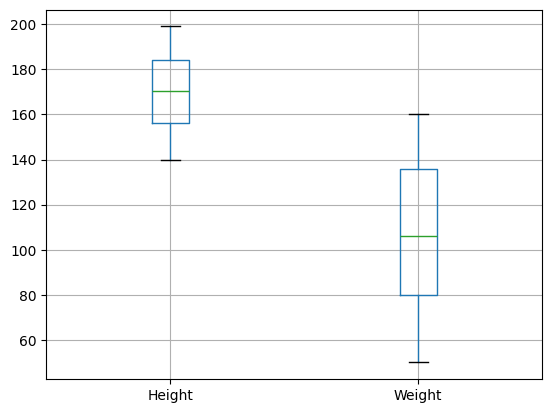

In [13]:
import matplotlib.pyplot as plt

df.boxplot(column=['Height', 'Weight'])

In [15]:
outlier_data = {
    'Gender': ["Male", "Female", "Female", "Male"],
    'Height': [51, 155, 45, 160],
    'Weight': [33, 320, 30, 355],
    'Index': [2, 5, 2, 5]
}
outlier_df = pd.DataFrame(outlier_data)

df =pd.concat([df, outlier_df], ignore_index=True)
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
499,Male,173,131,5
500,Male,51,33,2
501,Female,155,320,5
502,Female,45,30,2


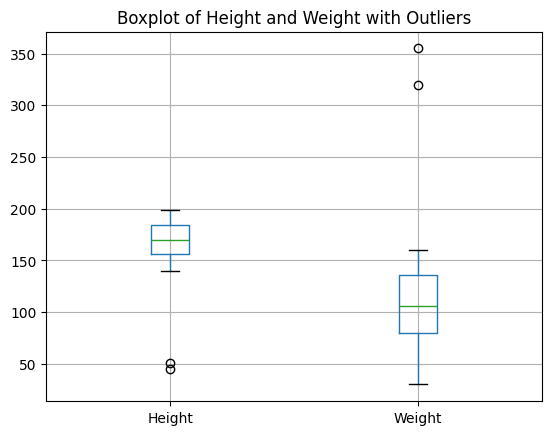

In [16]:
import matplotlib.pyplot as plt

#Membuat boxplot untuk kolom Height and Weight
df.boxplot(column=['Height', 'Weight'])
plt.title('Boxplot of Height and Weight with Outliers')
plt.show()

In [17]:
#Hitung kuartil pertama (Q1)
q1 = df['Height'].quantile(0.25)
print("Q1 : ",q1)
#Hitung kuartil ketiga(Q3)
q3 = df['Height'].quantile(0.75)
print("Q3 : ",q3)
iqr = q3 - q1
#Hitung batas bawah (Lower bound) dan Batas atas (Upper Bound) untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

#Tentukan Outlier dalam DataFrame 
outliers = df[(df['Height'] < lower_bound) | (df['Height'] > upper_bound)]

print("Outlier_Height:")
print(outliers)

Q1 :  156.0
Q3 :  184.0
Outlier_Height:
     Gender  Height  Weight  Index
500    Male      51      33      2
502  Female      45      30      2


In [18]:
#Ubah kolom menjadi binery : Female -0,Male -1
df['Gender'] = df['Gender'].replace({'Female': 0, 'Male': 1})
print(df['Gender'].unique())

[1 0]


In [19]:
# Menghitung statistik berdasarkan gender
stats = df.groupby('Gender').agg({
    'Weight': ['count', 'mean', 'min', 'max'],
    'Height': ['count', 'mean', 'min', 'max']
})

print(stats)

       Weight                      Height                      
        count        mean min  max  count        mean  min  max
Gender                                                         
0         255  105.698039  50  160    255  170.227451  140  199
1         245  106.314286  50  160    245  169.648980  140  199


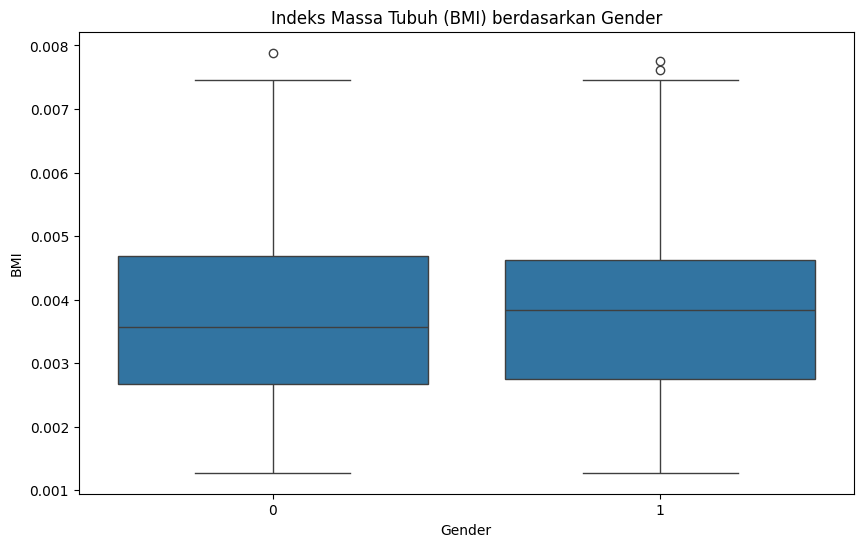

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung BMI
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Membuat grafik
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='BMI', data=df)
plt.title('Indeks Massa Tubuh (BMI) berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('BMI')
plt.show()